In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [4]:
df_reviews = pd.read_csv("data/RAW_interactions.csv")
print(df_reviews.head())
print(df_reviews['date'].max())
print(df_reviews['date'].min())

   user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                              review  
0  Great with a salad. Cooked on top of stove for...  
1  So simple, so delicious! Great for chilly fall...  
2  This worked very well and is EASY.  I used not...  
3  I made the Mexican topping and took it to bunk...  
4  Made the cheddar bacon topping, adding a sprin...  
2018-12-20
2000-01-25


In [5]:
num_users = len(df_reviews["user_id"].unique())
print("Number of Users:",num_users)

num_recipes_reviewed = len(df_reviews["recipe_id"].unique())
print("Number of Recipes Reviewed:",num_recipes_reviewed)

Number of Users: 226570
Number of Recipes Reviewed: 231637


Average Rating:  4.411016039852804


rating
0     60847
1     12815
2     14122
3     40852
4    187333
5    816229
Name: review, dtype: int64

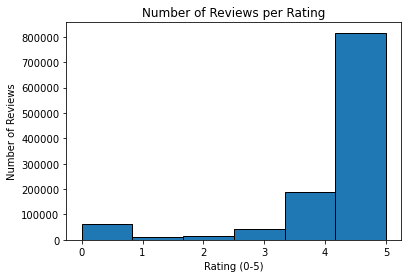

In [45]:
# Include this graphic in paper
#width = 0
#plt.hist(df_reviews["rating"].to_list())
plt.hist(df_reviews['rating'], bins=6,edgecolor='black')
plt.xlabel('Rating (0-5)')  
plt.ylabel('Number of Reviews')  
  
# displaying the title 
plt.title("Number of Reviews per Rating") 
plt.savefig('Histrogram_Number_of_Reviews_per_Rating.png',bbox_inches="tight")
print("Average Rating: ", df_reviews["rating"].mean())
df_reviews.dtypes
df_reviews.groupby("rating").count()["review"]

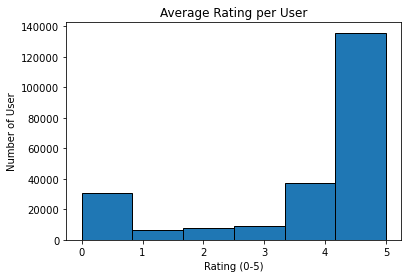

In [7]:
grouped = df_reviews.groupby(by="user_id")
averages = grouped.mean(["rating"]).round(decimals=0)
plt.hist(averages["rating"], bins=6,edgecolor='black')
plt.xlabel('Rating (0-5)')  
plt.ylabel('Number of Users')  
plt.title("Average Rating per User") 
plt.savefig('Histrogram_Average_Review_per_user.png',bbox_inches="tight")

In [55]:
user_w_0_avg = averages[averages["rating"] ==0].index.to_list()

df_reviews[df_reviews["user_id"].isin(user_w_0_avg)].groupby("user_id").count()

review_0 = df_reviews[df_reviews["rating"] == 0].groupby("user_id").count()
len(review_0)

44576

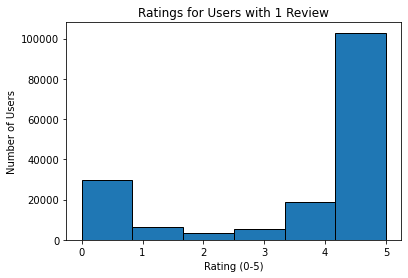

In [42]:
review_1 = df_reviews.groupby("user_id").count()
review_1 = review_1[review_1["review"] ==1].index
#len(review_1)/len(set(df_reviews["user_id"].tolist()))
rating_for1reviewers = df_reviews[df_reviews["user_id"].isin(review_1)]["rating"]
plt.hist(rating_for1reviewers, bins=6,edgecolor='black')
plt.xlabel('Rating (0-5)')  
plt.ylabel('Number of Users')  
plt.title("Ratings for Users with 1 Review") 
plt.savefig('Ratings_for_Users_with_1_Review.png',bbox_inches="tight")

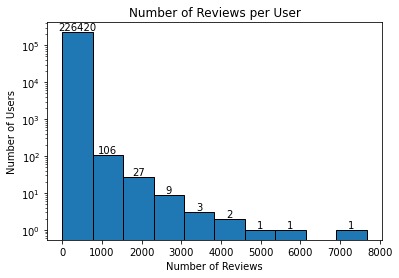

In [71]:
review_per_user = grouped.count()
#plt.hist(review_per_user["review"][100:])
review_counts = review_per_user["review"]
counts, edges, bars = plt.hist(review_counts,edgecolor='black', log=True)
#plt.ylim(0, 150)
#plt.lim(0, 150)
plt.bar_label(bars)
plt.xlabel('Number of Reviews')  
plt.ylabel('Number of Users')  
plt.title("Number of Reviews per User") 
plt.savefig('Number_of_Reviews_per_User.png',bbox_inches="tight")

In [7]:
review_per_user[review_per_user["review"]>3].shape

(28228, 4)

In [8]:
most_reviews_by_user = review_per_user["review"].max()
print("Most reviews by a user:", most_reviews_by_user)
median_reviews_by_user = review_per_user["review"].median()
print("Median reviews by a user:", median_reviews_by_user)
mean_reviews_by_user = review_per_user["review"].mean()
print("Mean reviews by a user:",mean_reviews_by_user)

Most reviews by a user: 7671
Median reviews by a user: 1.0
Mean reviews by a user: 4.997122302158274


In [9]:
#plt.plot(grouped_date.axes[0].tolist(), grouped_date["review"])

NameError: name 'grouped_date' is not defined

In [10]:
grouped_date = df_reviews.groupby(by="date").count()
idx_day_most_reviews = grouped_date["review"].idxmax()
day_w_most_most_reviews = grouped_date.loc[idx_day_most_reviews]
date = day_w_most_most_reviews.name


print("The date that had the most reviews is:", date)
print("It has", grouped_date["review"].max(), "reviews")

The date that had the most reviews is: 2008-01-27
It has 723 reviews


(array([  2698.,  48791.,  98441., 192459., 311317., 212894., 114508.,
         66545.,  39164.,  45550.]),
 array([10981. , 11671.4, 12361.8, 13052.2, 13742.6, 14433. , 15123.4,
        15813.8, 16504.2, 17194.6, 17885. ]),
 <BarContainer object of 10 artists>)

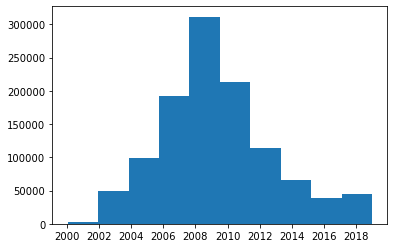

In [11]:
df_reviews['date']= pd.to_datetime(df_reviews['date'],format='%Y-%m-%d')
df_reviews['day_of_week'] = df_reviews['date'].dt.dayofweek
plt.hist(df_reviews["date"])

(array([202145.,  98245.,  93883.,  89504.,  97027.,  91356.,  88766.,
         89063.,  95018., 187360.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

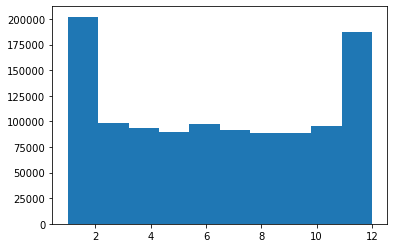

In [12]:
df_reviews['year']= df_reviews['date'].dt.year
df_reviews['month']= df_reviews['date'].dt.month
df_reviews['day']= df_reviews['date'].dt.day

plt.hist(df_reviews["month"])

(array([  3012.,  53883., 112593., 230952., 167295., 266854., 128557.,
         79991.,  41521.,  47709.]),
 array([2000. , 2001.8, 2003.6, 2005.4, 2007.2, 2009. , 2010.8, 2012.6,
        2014.4, 2016.2, 2018. ]),
 <BarContainer object of 10 artists>)

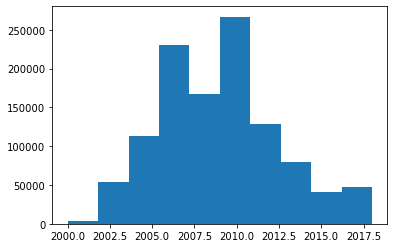

In [13]:
plt.hist(df_reviews["year"])

(array([112548., 113081., 111711., 111344., 109565., 110014., 110504.,
        112389., 113050., 128161.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

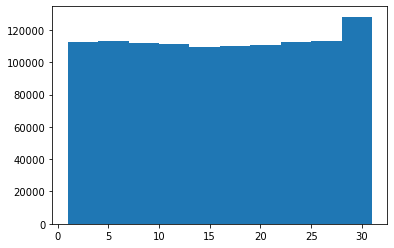

In [14]:
plt.hist(df_reviews["day"])

array([0, 2, 6, 5, 4, 3, 1])

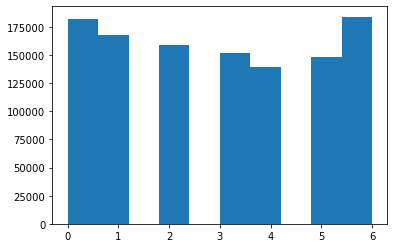

In [15]:
plt.hist(df_reviews["day_of_week"])
df_reviews["day_of_week"].unique()

In [1]:
df_recipes = pd.read_csv("data/RAW_recipes.csv")
df_recipes.head()

NameError: name 'pd' is not defined

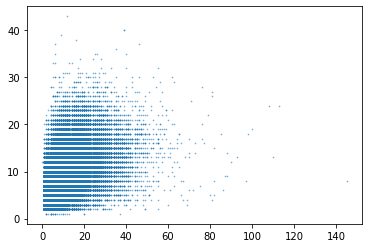

In [17]:
x = df_recipes['n_steps']
y = df_recipes['n_ingredients']

plt.scatter(x, y, alpha=0.5, marker=".", s=2)
plt.show()

(array([503.,  30.,   7.,   5.,   1.,   1.,   0.,   2.,   0.,   3.]),
 array([1.000000e+00, 2.305550e+04, 4.611000e+04, 6.916450e+04,
        9.221900e+04, 1.152735e+05, 1.383280e+05, 1.613825e+05,
        1.844370e+05, 2.074915e+05, 2.305460e+05]),
 <BarContainer object of 10 artists>)

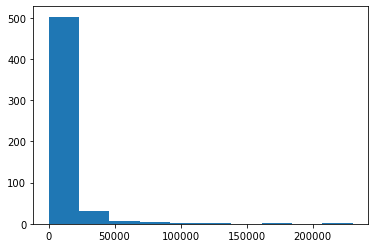

In [18]:
recipes_df = df_recipes.copy()
recipes_df['tags_list'] = df_recipes['tags'].apply(ast.literal_eval)
recipes_df['n_tags'] = recipes_df['tags_list'].apply(len)
tags = recipes_df[['tags_list','id']].explode('tags_list').rename(columns={'tags_list':'tag'})
tags
tag_counts = tags.groupby('tag').count()
plt.hist(tag_counts["id"])

In [53]:
average_rating_per_recipe = df_reviews.groupby(by="recipe_id").mean().round(decimals=0)
average_rating_per_recipe.index.name = 'id'
average_rating_per_recipe.reset_index(inplace=True)
average_rating_per_recipe

,id,user_id,rating,day_of_week,year,month,day
0,38,4.516842e+08,4.0,2.0,2011.0,4.0,16.0
1,39,3.932540e+05,3.0,5.0,2007.0,1.0,20.0
2,40,4.048040e+05,4.0,3.0,2006.0,6.0,14.0
3,41,5.588700e+05,4.0,3.0,2006.0,2.0,20.0
4,43,1.060485e+06,1.0,5.0,2009.0,2.0,7.0
...,...,...,...,...,...,...,...
231632,537459,3.055310e+05,5.0,1.0,2018.0,11.0,13.0
231633,537485,2.001298e+09,5.0,5.0,2018.0,11.0,17.0
231634,537543,2.002103e+09,0.0,5.0,2018.0,12.0,15.0
231635,537671,2.002327e+09,0.0,5.0,2018.0,12.0,15.0


In [56]:
recipes_df2 = recipes_df[["id","n_steps","n_ingredients", "n_tags"]]
recipes_df2

,id,n_steps,n_ingredients,n_tags
0,137739,11,7,20
1,31490,9,6,20
2,112140,6,13,9
3,59389,11,11,30
4,44061,5,8,21
...,...,...,...,...
231632,486161,7,22,20
231633,493372,1,13,14
231634,308080,7,8,13
231635,298512,9,10,12


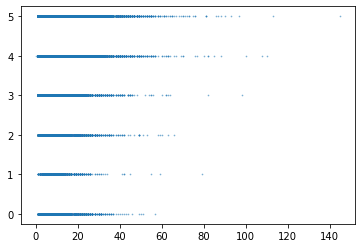

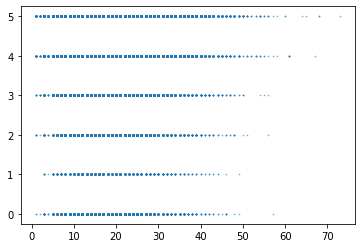

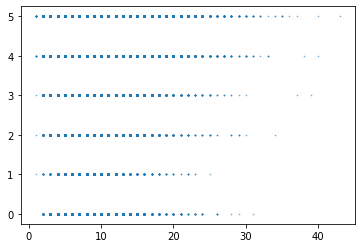

In [57]:
result = pd.concat([average_rating_per_recipe, recipes_df2], axis=1)

plt.scatter(result['n_steps'],result['rating'], alpha=0.5, marker=".", s=2)
plt.show()

plt.scatter(result['n_tags'],result['rating'], alpha=0.5, marker=".", s=2)
plt.show()

plt.scatter(result['n_ingredients'],result['rating'], alpha=0.5, marker=".", s=2)
plt.show()

In [68]:
df = result[['n_ingredients','rating']]
df = df.groupby(by=["n_ingredients","rating"]).count()
df

Empty DataFrame
Columns: []
Index: [(1, 1.0), (1, 2.0), (1, 3.0), (1, 4.0), (1, 5.0), (2, 0.0), (2, 1.0), (2, 2.0), (2, 3.0), (2, 4.0), (2, 5.0), (3, 0.0), (3, 1.0), (3, 2.0), (3, 3.0), (3, 4.0), (3, 5.0), (4, 0.0), (4, 1.0), (4, 2.0), (4, 3.0), (4, 4.0), (4, 5.0), (5, 0.0), (5, 1.0), (5, 2.0), (5, 3.0), (5, 4.0), (5, 5.0), (6, 0.0), (6, 1.0), (6, 2.0), (6, 3.0), (6, 4.0), (6, 5.0), (7, 0.0), (7, 1.0), (7, 2.0), (7, 3.0), (7, 4.0), (7, 5.0), (8, 0.0), (8, 1.0), (8, 2.0), (8, 3.0), (8, 4.0), (8, 5.0), (9, 0.0), (9, 1.0), (9, 2.0), (9, 3.0), (9, 4.0), (9, 5.0), (10, 0.0), (10, 1.0), (10, 2.0), (10, 3.0), (10, 4.0), (10, 5.0), (11, 0.0), (11, 1.0), (11, 2.0), (11, 3.0), (11, 4.0), (11, 5.0), (12, 0.0), (12, 1.0), (12, 2.0), (12, 3.0), (12, 4.0), (12, 5.0), (13, 0.0), (13, 1.0), (13, 2.0), (13, 3.0), (13, 4.0), (13, 5.0), (14, 0.0), (14, 1.0), (14, 2.0), (14, 3.0), (14, 4.0), (14, 5.0), (15, 0.0), (15, 1.0), (15, 2.0), (15, 3.0), (15, 4.0), (15, 5.0), (16, 0.0), (16, 1.0), (16, 2.0), (16, 3.0), (16, 4.0), (16, 5.0), (17, 0.0), (17, 1.0), (17, 2.0), (17, 3.0), (17, 4.0), ...]

[187 rows x 0 columns]

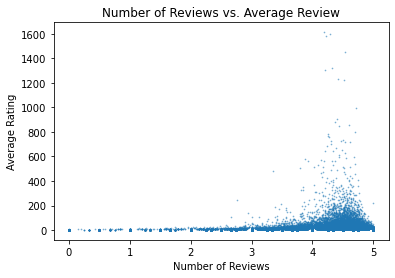

In [107]:
# Avg review vs. number of reviews
avg_rating = df_reviews.groupby("recipe_id").mean()["rating"]
counts = df_reviews.groupby("recipe_id").count()["rating"]
plt.scatter(avg_rating, counts, alpha=0.5, marker=".", s=2)
plt.ylabel('Number of Reviews')  
plt.xlabel('Average Rating')  
plt.title("Number of Reviews vs. Average Review")
plt.savefig('Number_of_Reviews_vs_Average_Review.png',bbox_inches="tight")